In [249]:
def align_sizes(path_1, path_2):
    img1 = cv2.imread(path_1)
    img2 = cv2.imread(path_2)

    if (img1 is None or img2 is None):
        return
    elif (img1.shape[0] == img1.shape[1] and img2.shape[0] == img2.shape[1]
          and img1.shape[0] == img2.shape[0] and img1.shape[1] == img2.shape[1]):
        # artificial early return for speeding up process.
        return
    else:
        img1 = _assure_square(img1)
        img2 = _assure_square(img2)

        if (img1.shape[0] > img2.shape[0]):
            img1 = cv2.resize(img1, (img2.shape[0], img2.shape[1]))
        elif (img2.shape[0] > img1.shape[0]):
            img2 = cv2.resize(img2, (img1.shape[0], img1.shape[1]))

        cv2.imwrite(path_1, img1)
        cv2.imwrite(path_2, img2)


def _assure_square(img):
    if (img.shape[0] > img.shape[1]):
        return cv2.resize(img, (img.shape[0], img.shape[0]))
    elif (img.shape[1] > img.shape[0]):
        return cv2.resize(img, (img.shape[1], img.shape[1]))
    else:
        return img


In [353]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path1 = "./image_registration/16-3-6D1D71-B-18248A-B.he.jpg"
path2 = "./image_registration/16-3-6D1D71-B-18248A-B.ihc.jpg"

he = cv2.imread(path1)
ihc = cv2.imread(path2)

he = he[106:5200-106, 106:5200-106,]

he_gray = cv2.cvtColor(he, cv2.COLOR_BGR2GRAY)
ihc_gray = cv2.cvtColor(ihc, cv2.COLOR_BGR2GRAY)


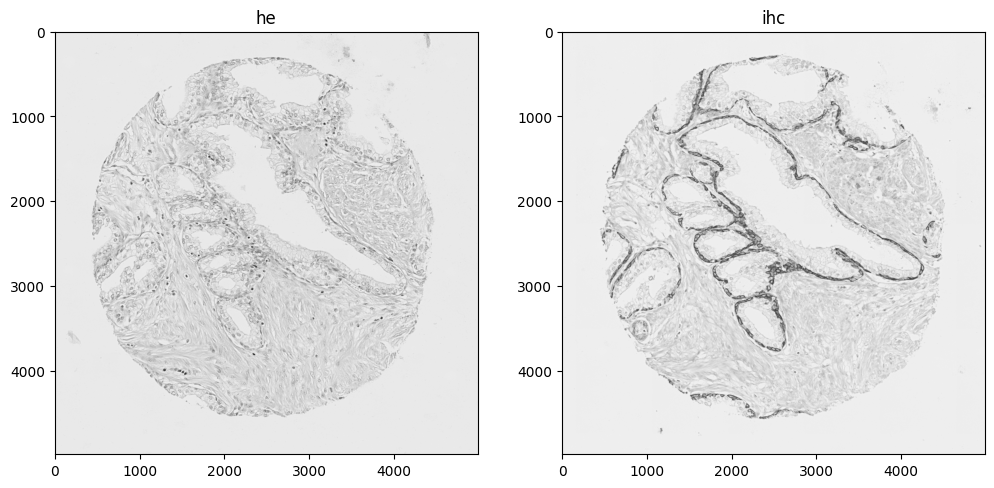

In [332]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(he_gray, cmap="gray")
ax1.set_title("he")
ax2.imshow(ihc_gray, cmap="gray")
ax2.set_title("ihc")

plt.show()

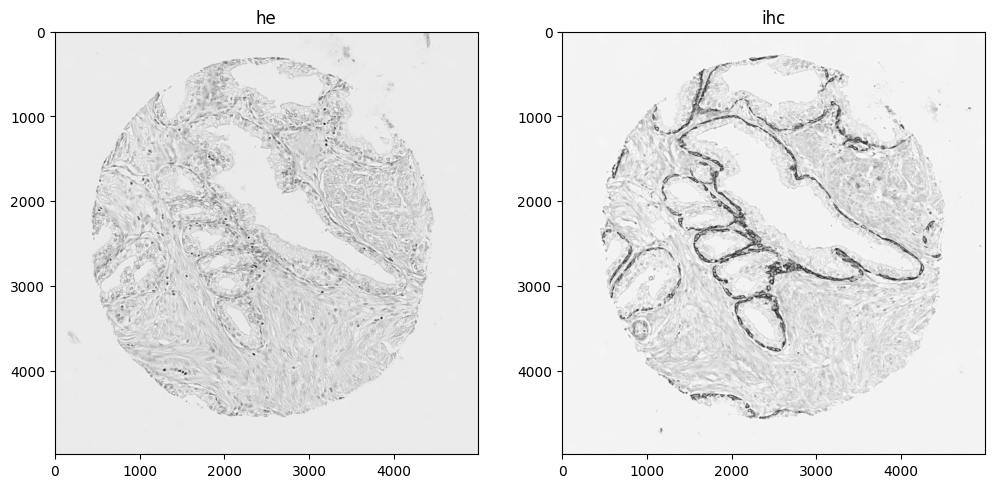

In [358]:
he_gauss = cv2.GaussianBlur(he_gray, (5,5), 0)
ihc_gauss = cv2.GaussianBlur(ihc_gray, (5,5), 0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(he_gauss, cmap="gray")
ax1.set_title("he")
ax2.imshow(ihc_gauss, cmap="gray")
ax2.set_title("ihc")

plt.show()

In [370]:

stack_reg = StackReg(StackReg.SCALED_ROTATION)
transformation_matrix = stack_reg.register(he_gauss, ihc_gauss)

invert_identity = np.array([
    [-1, 1, 1], 
    [ 1,-1, 1], 
    [ 1, 1,-1]
])
transformation_matrix = transformation_matrix*invert_identity

border_value = np.average(ihc[0], axis=0)
translated_ihc = cv2.warpPerspective(ihc, transformation_matrix, (ihc.shape[0], ihc.shape[1]), borderValue=border_value)

cv2.imwrite('./image_registration/result_he.jpg', he)
cv2.imwrite('./image_registration/result_ihc.jpg', translated_ihc)

True